In [39]:
import pandas as pd
df_final=pd.read_csv('Jeux de données/base_regularité_region.csv',sep=",")
df_final['date']=pd.to_datetime(df_final['date'])  #date en format datetime pour un meilleur affichage sur les graphiques


# Visualisation de la régularité

1.taux de regularite par région

C:\Users\choho\AppData\Local\Temp\ipykernel_82684\1560434223.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


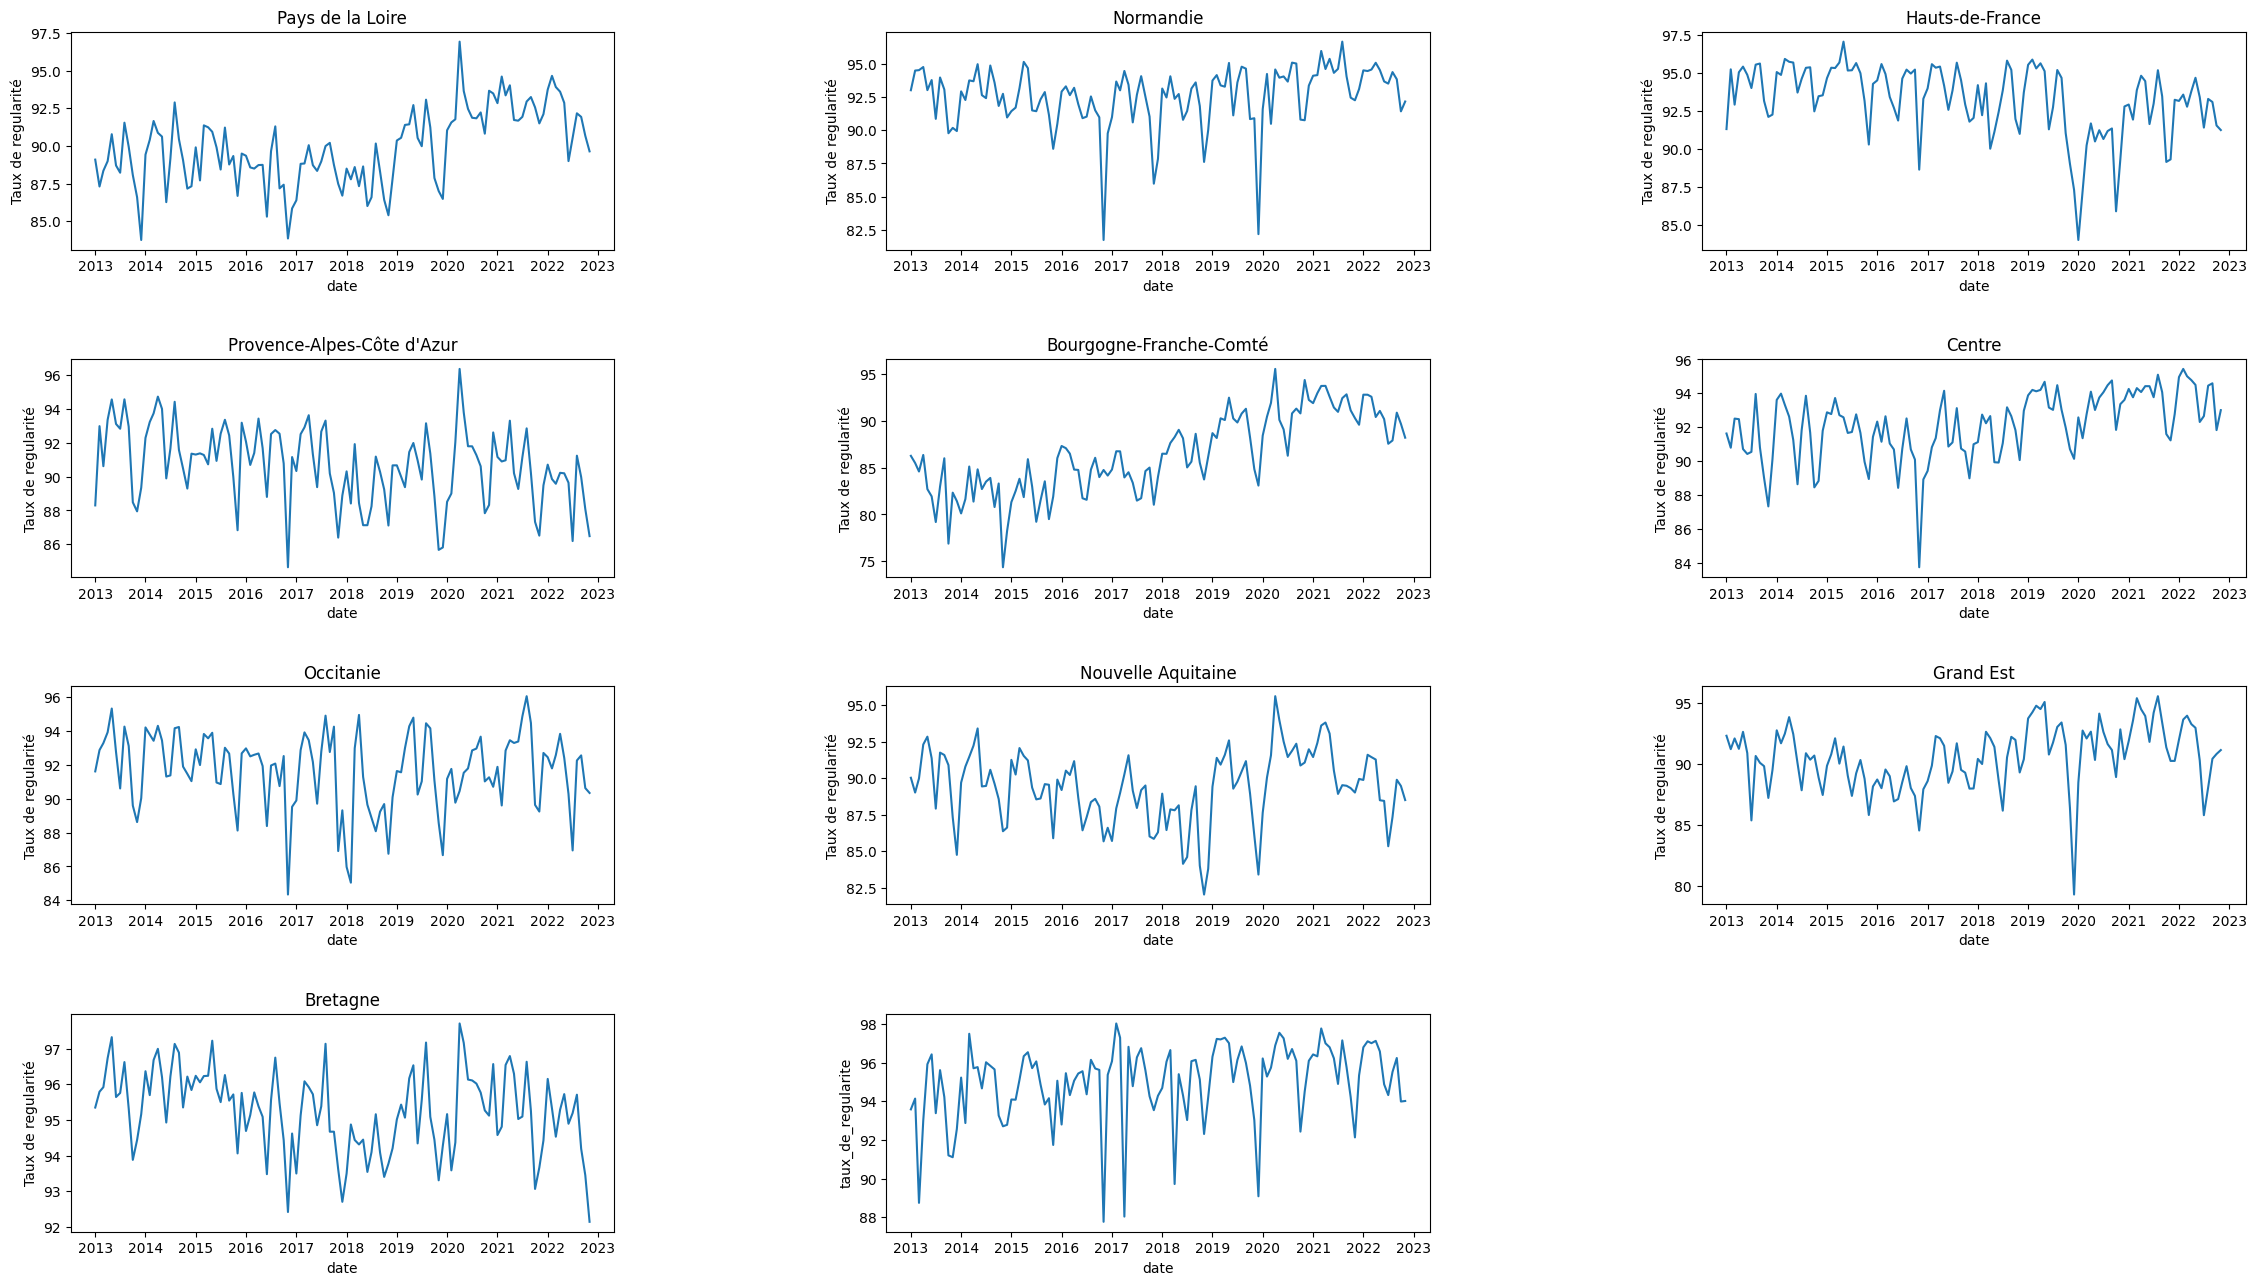

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

list_regions_final=df_final['new_region'].unique()
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.1, right = 1.5,top = 0.9, wspace = 0.5, hspace = 0.5)
for i, region in enumerate(list_regions_final):
    df_region_i = df_final[df_final['new_region'] == region]
    df_region_i = df_region_i.sort_values(by='date')
    plt.xlabel('date')
    plt.ylabel('Taux de regularité')
    plt.title(region)
    # Tracer une série temporelle en utilisant la colonne date comme variable de position
    plt.subplot(4,3,i+1)
    sns.lineplot(x="date", y="taux_de_regularite", data=df_region_i)
    


On observe pour une raison qu'on ignore encore qu'à chaque novembre survienne des creux de ponctualité des trains. Les commentaires donnent diversent raisons comme des constructions, des intempéries, etc
'''a=df[df['mois']==11]
a['commentaires'].unique()'''

C:\Users\choho\AppData\Local\Temp\ipykernel_82684\1838946298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat=df_final.corr()


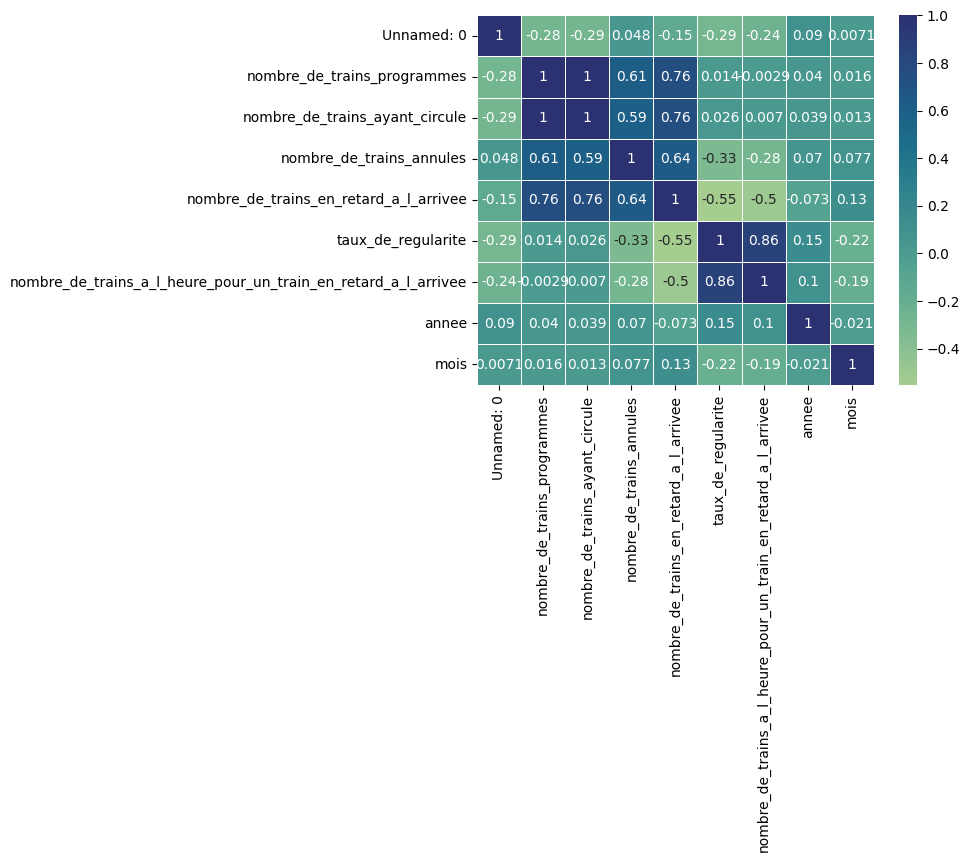

In [14]:
df_final=df_final.sort_values('date')
mat=df_final.corr()
sns.heatmap(mat,annot=True, cmap='crest',linewidth=.5)
plt.show()

2.Relation entre le nombre de trains prévus et le nombre de trains ayant effectivement circulé.

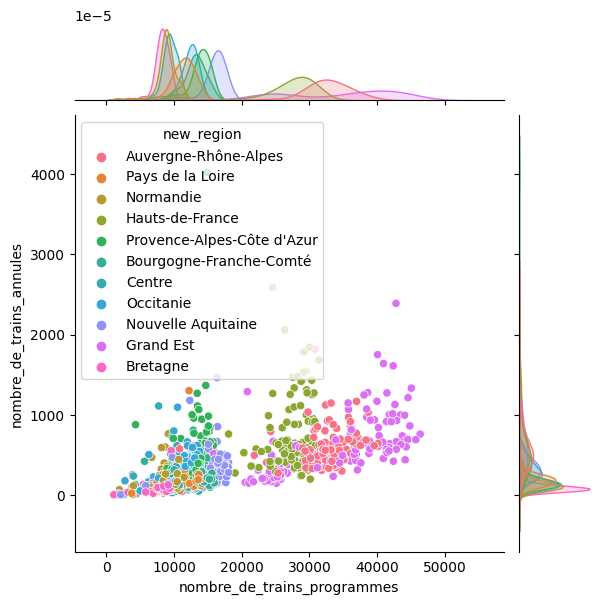

In [15]:
sns.jointplot(data=df_final, x="nombre_de_trains_programmes", y="nombre_de_trains_annules", hue="new_region")

On remarque que les régions ayant le plus de trains programmés sont le "Grand Est" et "l'Auvergne-Rhône-Alpes" alors que celles ayant le moins de trains programmés sont la Bretagne et l'Occitanie.
L'Auvergne-Rhône-Alpes fait également partie des régions où le nombre de trains annulés est le plus élevé avec aussi la région "Haut de France".